# Лабораторная работа №10

**Тема: "Линейные стационарные системы"**

Работу выполнил

студент группы 5130901/20201

Нестеренко Сергей Андреевич

---

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import os
from thinkdsp import read_wave, decorate

## Упражнение 10.1

Загрузим необходимые аудиофайлы:

In [3]:
if not os.path.exists('audio/92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

if not os.path.exists('audio/180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

Считаем сигналы:

In [4]:
violin = read_wave('audio/92002__jcveliz__violin-origional.wav')
response = read_wave('audio/180960__kleeb__gunshot.wav')

In [5]:
start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()

response.make_audio()

In [6]:
start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

response_len = len(response)
violin.truncate(response_len)
violin.normalize()

violin.make_audio()

Повторим действия автора, но к сигналам скрипки и выстрела в конец добавим 400000 нулей:

In [7]:
import numpy as np

violin.ys = np.append(violin.ys, np.zeros(400000))
response.ys = np.append(response.ys, np.zeros(400000))
transfer = response.make_spectrum()
spectrum = violin.make_spectrum()
transfer.fs = spectrum.fs
len(spectrum.hs), len(transfer.hs)

(244554, 244554)

Получим тот же результат, что в решении автора, но без лишней ноты в конце:

In [8]:
output = (spectrum * transfer).make_wave()
output.truncate(response_len)
output.normalize()
output.make_audio()

## Упражнение 10.2

Загрузим импульсную характеристику и запись игры на трубе.

In [9]:
if not os.path.exists('audio/stalbans_a_mono.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav

if not os.path.exists('audio/170255__dublie__trumpet.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav

Считаем импульсную характеристику.

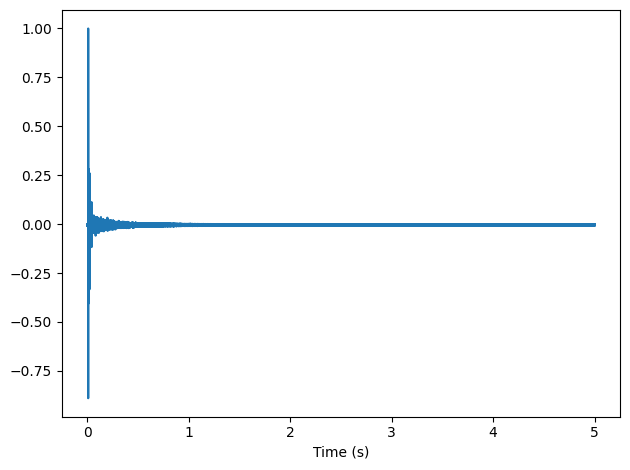

In [10]:
response = read_wave('audio/stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

response.make_audio()

Построим спектр импульсной характеристики:

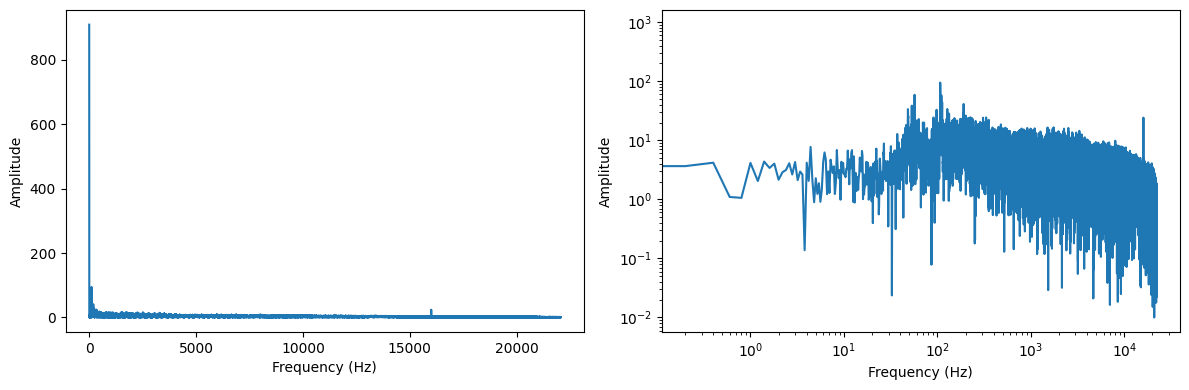

In [11]:
import matplotlib.pyplot as plt

transfer = response.make_spectrum()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')
plt.subplot(1, 2, 2)
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude', xscale='log', yscale='log')
plt.tight_layout()

Считаем запись игры на трубе:

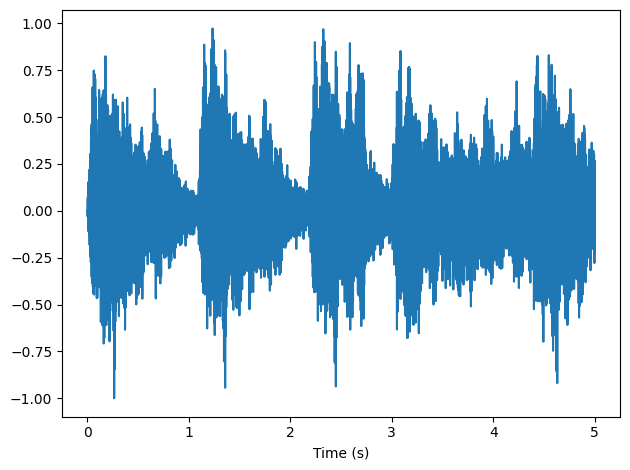

In [12]:
wave = read_wave('audio/170255__dublie__trumpet.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()

wave.plot()
decorate(xlabel='Time (s)')

Так запись звучит до изменений:

In [13]:
wave.make_audio()

Применим импульсную характеристику к данной записи и послушаем, что получилось:

In [14]:
spectrum = wave.make_spectrum()
output = (spectrum * transfer).make_wave()
output.normalize()
output.make_audio()

Аналогичный результат получится, если применить импульсную характеристику к записи через свертку:

In [15]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()